<a href="https://colab.research.google.com/github/ShreyJais/ML-MSc_AIML/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading the data
data=pd.read_csv('/content/drive/MyDrive/ML/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
for col in ['sex','smoker','region']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

In [9]:
X = data.drop(columns='charges', axis=1)
y = data['charges']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [12]:
#Building linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Calculate and display the following evaluation metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R2) score
- Adjusted R-squared score
- Residual Sum of Squares (RSS)
- Explained Variance Score

In [33]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2s, explained_variance_score as evs

In [28]:
#calculating mean absolute error
X_test_prediction = model.predict(X_test)
maerror=mae(Y_test, X_test_prediction)
maerror

4024.4442885471926

In [29]:
#calculating mean squared error
mserror=mse(Y_test,X_test_prediction)
mserror

33518303.67739486

In [30]:
#calculating root mean squared error
import math
rmserror=np.sqrt(mserror)
rmserror

5789.499432368472

In [32]:
#calculating R-squared score
r2score=r2s(Y_test,X_test_prediction)
r2score

0.7624676741521532

In [17]:
#calculating adjusted R-squared score
adj_R2 = 1- ((1-r2score) * (len(X_train)-1)/(len(X_train)-len(X.columns)-1))
adj_R2

0.7611269460664645

In [18]:
#Calculating residual sum of squares
rss=np.sum(np.square(X_test_prediction-Y_test))
rss

8982905385.541822

In [34]:
#calculating explained variance score
evscore=evs(Y_test,X_test_prediction)
evscore

0.7627917813502951

In [20]:
#Determining which features have the most significant impact on predicting
for col in range(0,6):
  print(X.columns[col]+":"+str(model.coef_[col]))

age:244.81803914967062
sex:119.28749861365341
bmi:357.23899161169425
children:418.9913322099939
smoker:23621.545278133275
region:-363.98113662535366


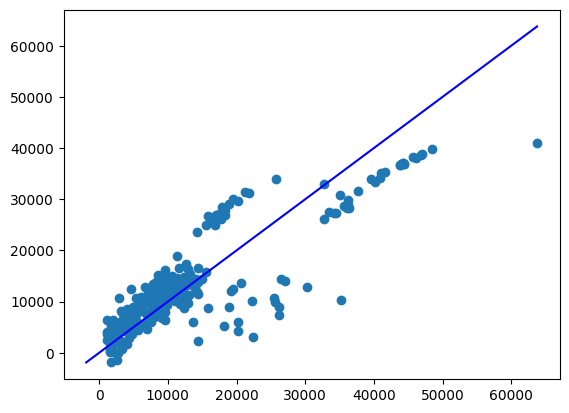

In [35]:
#showing the actual insurance charges vs. predicted insurance charges
g=plt.scatter(Y_test,X_test_prediction)
p1 = max(max(X_test_prediction), max(Y_test))
p2 = min(min(X_test_prediction), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.show()